# Trybe Challenge
### Daniel N. Rocha
Processo Seletivo para Data Scientist <br>
Open University Learning Analytics dataset
This page introduces the anonymised Open University Learning Analytics Dataset (OULAD). It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by “B” and “J” respectively. The dataset consists of tables connected using unique identifiers. All tables are stored in the csv format.

<div>
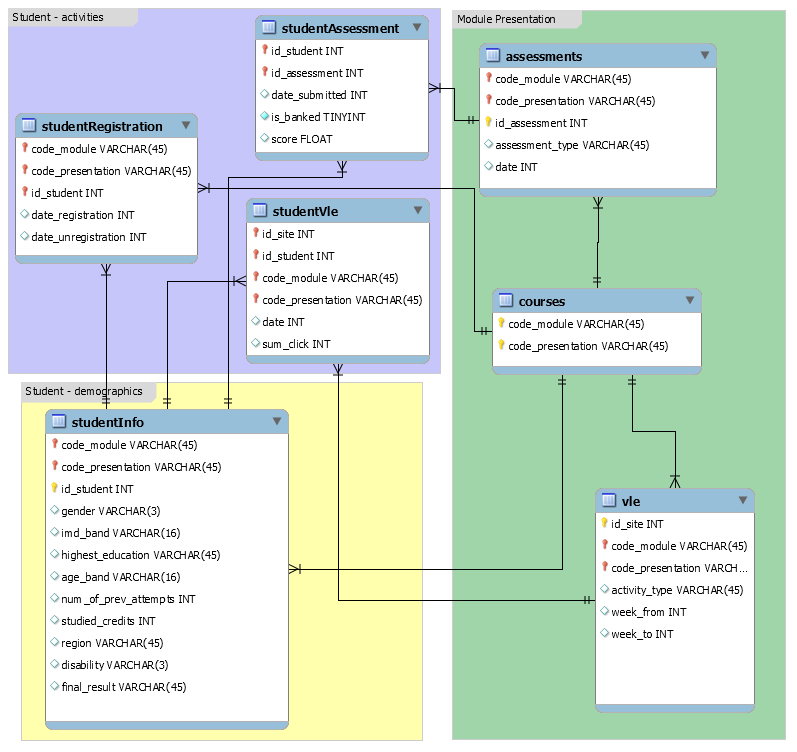
</div>

### Importing packages:

In [632]:
import pandas as pd
import numpy as np
import seaborn as sns
import palettable
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [633]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

import matplotlib.style
import matplotlib as mpl
for m,n in zip(['grid.color','axes.titlecolor','axes.labelcolor','xtick.color','ytick.color','axes.titlesize',
    'figure.figsize','legend.framealpha'],['white','white','white','white','white','20.0','13.0, 8.0','0.8']):
    mpl.rcParams[m] = n

### Importing the data:

In [513]:
path = '/Users/pedrocerbino/TrybeChallenge/anonymisedData/'

In [514]:
# list of all available modules and their presentations
courses = pd.read_csv(path+'courses.csv')
courses.head(2)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269


## Exploratory Data Analysis

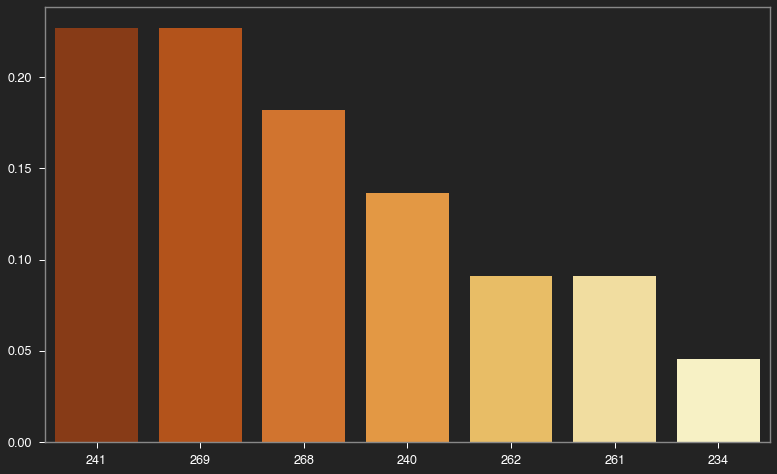

In [515]:
to_plot = courses.module_presentation_length.value_counts(True)
sns.barplot(x=to_plot.index,y=to_plot.values,palette='YlOrBr_r',order=to_plot.index);

In [516]:
# demographic information about the students together with their results
studentInfo = pd.read_csv(path+'studentInfo.csv')
studentInfo.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass


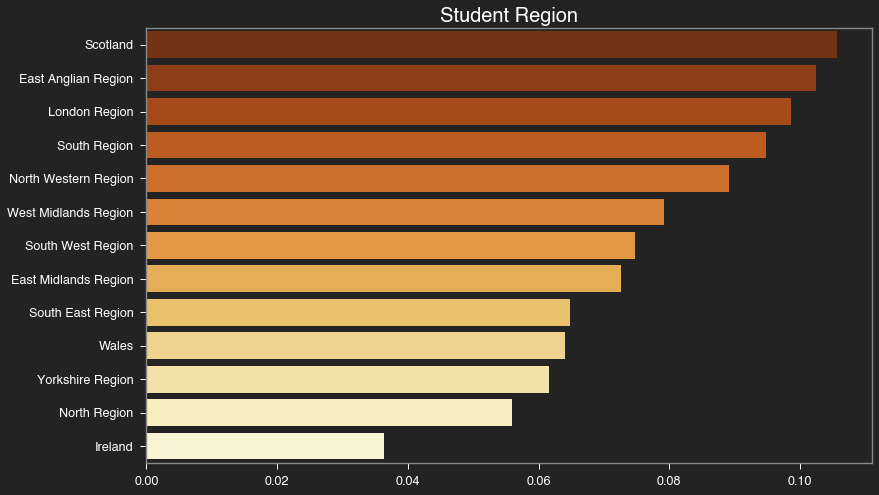

In [517]:
to_plot = studentInfo.region.value_counts(True)
sns.barplot(y=to_plot.index,x=to_plot.values,palette='YlOrBr_r')
plt.title('Student Region');

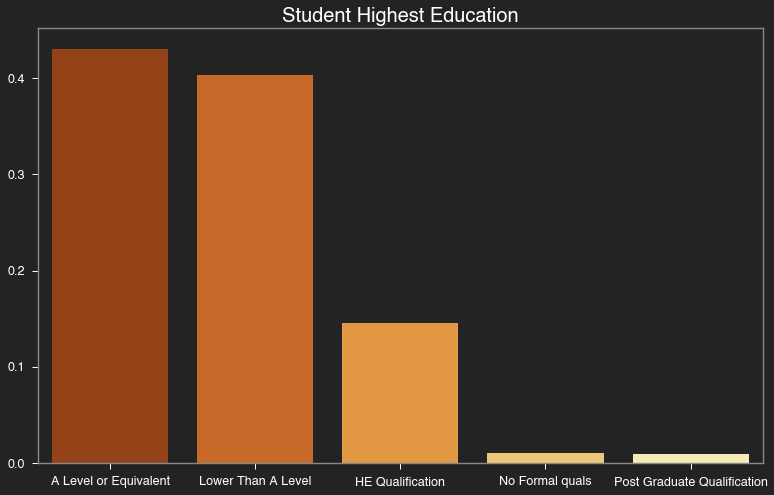

In [518]:
to_plot = studentInfo.highest_education.value_counts(True)
sns.barplot(x=to_plot.index,y=to_plot.values,palette='YlOrBr_r')
plt.title('Student Highest Education');

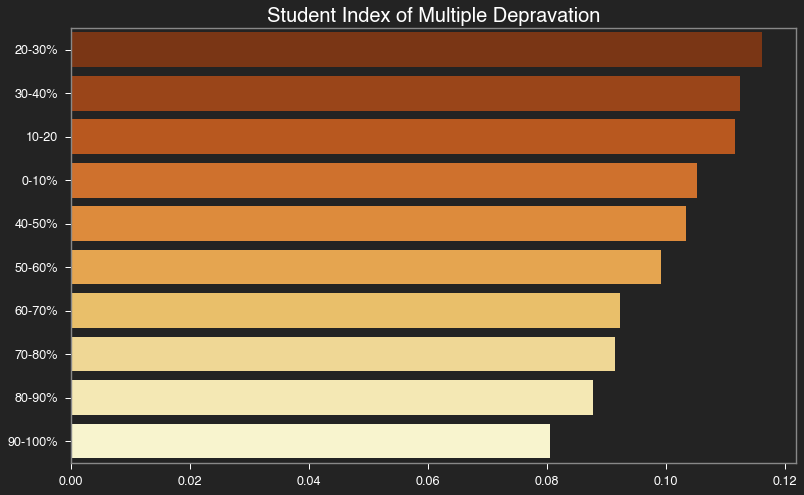

In [519]:
to_plot = studentInfo.imd_band.value_counts(True)
sns.barplot(y=to_plot.index,x=to_plot.values,palette='YlOrBr_r')
plt.title('Student Index of Multiple Depravation');

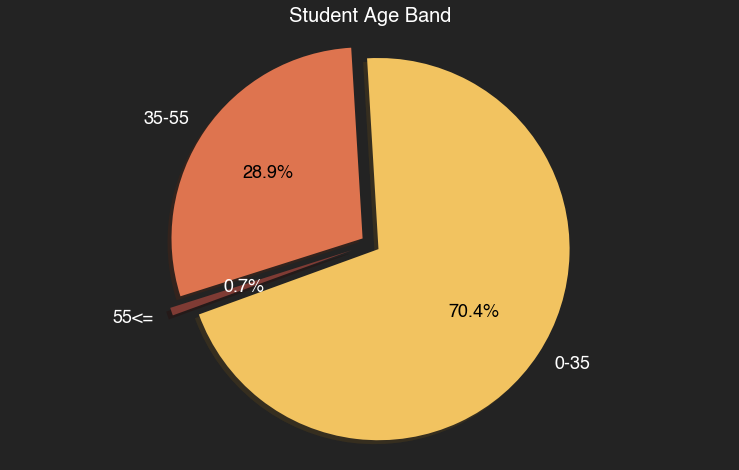

In [520]:
to_plot = studentInfo.age_band.value_counts(True)

import palettable
cmap = palettable.scientific.sequential.LaJolla_5.hex_colors[1:-1]

explode = (0.05, 0.05, 0.1)
_, _, autotexts = plt.pie(to_plot.values, explode=explode, labels=to_plot.index, autopct='%1.1f%%',
        shadow=True, startangle=200, colors=cmap, textprops={'size':18,'color':'w'})
plt.axis('equal')
plt.title('Student Age Band')
i=0
for autotext in autotexts:
    if i==2:
        autotext.set_color('w')
    else:
        autotext.set_color('black');
    i+=1

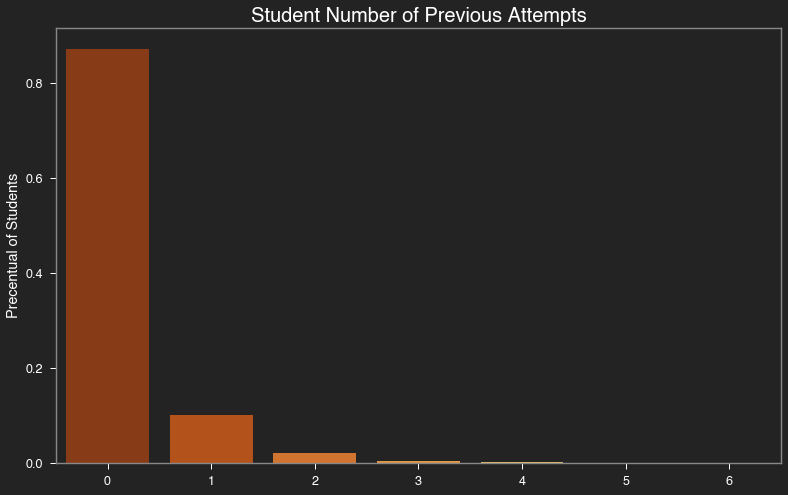

In [521]:
to_plot = studentInfo.num_of_prev_attempts.value_counts(True)
sns.barplot(x=to_plot.index,y=to_plot.values,palette='YlOrBr_r')
plt.title('Student Number of Previous Attempts')
plt.ylabel('Precentual of Students');

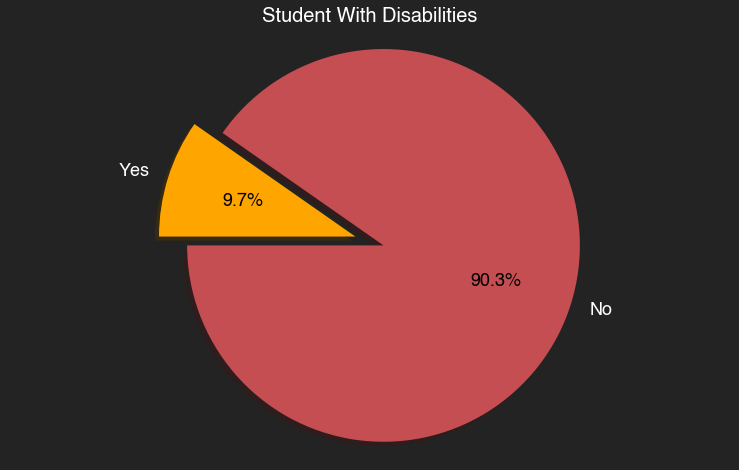

In [522]:
to_plot = studentInfo.disability.value_counts(True)

explode = (0, 0.15)
_, _, autotexts = plt.pie(to_plot.values, explode=explode, labels=['No','Yes'], autopct='%1.1f%%',
        shadow=True, startangle=180, colors=['r','orange'], textprops={'size':18,'color':'w'})
plt.axis('equal')
plt.title('Student With Disabilities')
for autotext in autotexts:
    autotext.set_color('black');

In [523]:
import palettable
cmap = palettable.scientific.sequential.LaJolla_6.hex_colors[1:]

/Users/pedrocerbino/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



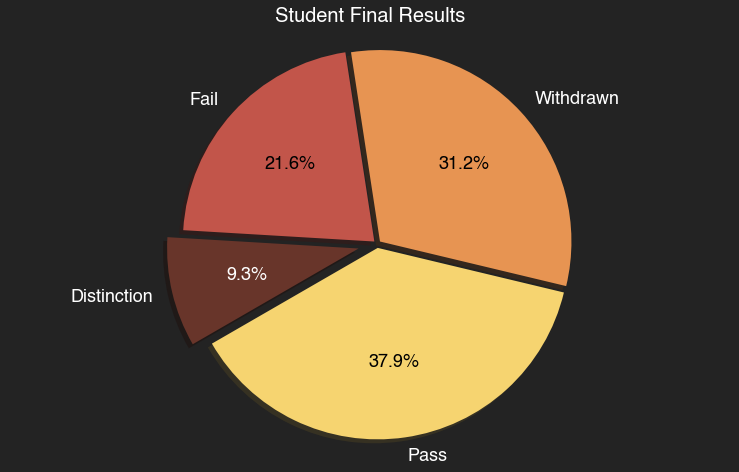

In [524]:
to_plot = studentInfo.final_result.value_counts(True)

explode = (0.02, 0.02, 0.02, 0.1)
fig1, ax1 = plt.subplots()
_, _, autotexts = plt.pie(to_plot.values, explode=explode, labels=to_plot.index, autopct='%1.1f%%',
        shadow=True, startangle=210, colors=cmap, textprops={'size':18,'color':'w'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Student Final Results")
i=0
for autotext in autotexts:
    if i==3:
        autotext.set_color('w')
    else:
        autotext.set_color('black');
    i+=1

In [525]:
# information about the time when the student registered for the module presentation
# for students who unregistered the date of unregistration is also recorded. 
studentRegistration = pd.read_csv(path+'studentRegistration.csv')
studentRegistration.head(2)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN


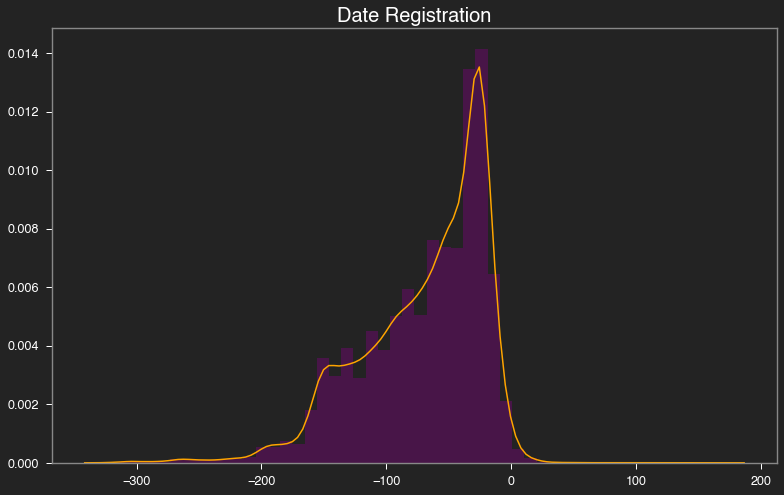

In [526]:
sns.distplot(studentRegistration.date_registration, color='purple', kde_kws={"color":"orange"})
plt.title('Date Registration')
plt.xlabel('');

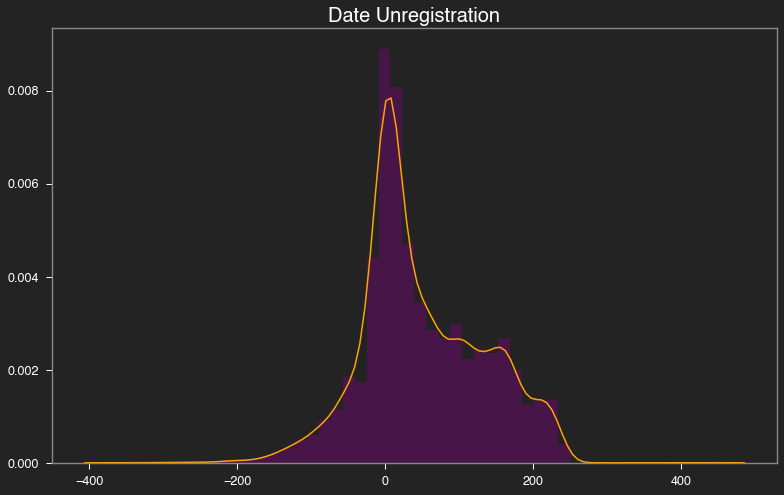

In [527]:
sns.distplot(studentRegistration.date_unregistration, color='purple', kde_kws={"color":"orange"})
plt.title('Date Unregistration')
plt.xlabel('');

In [528]:
student = studentInfo.merge(studentRegistration)
student.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN


In [529]:
# information about assessments in module-presentations. 
# usually, every presentation has a number of assessments followed by the final exam
assessments = pd.read_csv(path+'assessments.csv')
assessments.rename(inplace=True,columns={'date':'assessments_date'})
assessments.head(2)

,code_module,code_presentation,id_assessment,assessment_type,assessments_date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0


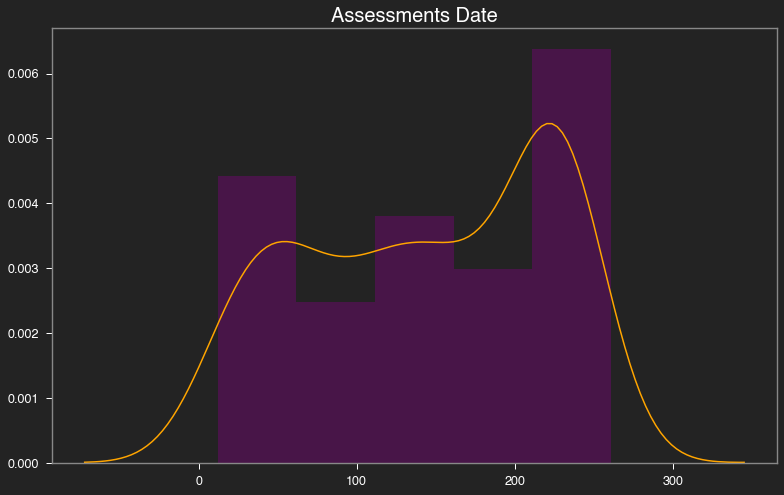

In [530]:
sns.distplot(assessments.assessments_date, color='purple', kde_kws={"color":"orange"})
plt.title('Assessments Date')
plt.xlabel('');

In [531]:
# results of students’ assessments. 
# if the student does not submit the assessment, no result is recorded. 
# the final exam submissions is missing, if the result of the assessments is not stored 
# in the system
studentAssessment = pd.read_csv(path+'studentAssessment.csv')
studentAssessment.head(2)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0


### Creating the Weighted Score Variable

In [532]:
studentWeightedScore = studentAssessment.merge(assessments)
studentWeightedScore['weighted_score'] = studentWeightedScore.score * studentWeightedScore.weight
studentWeightedScore.drop(columns=['score','weight'],inplace=True)
studentWeightedScore.head(2)

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,assessments_date,weighted_score
0,1752,11391,18,0,AAA,2013J,TMA,19.0,780.0
1,1752,28400,22,0,AAA,2013J,TMA,19.0,700.0


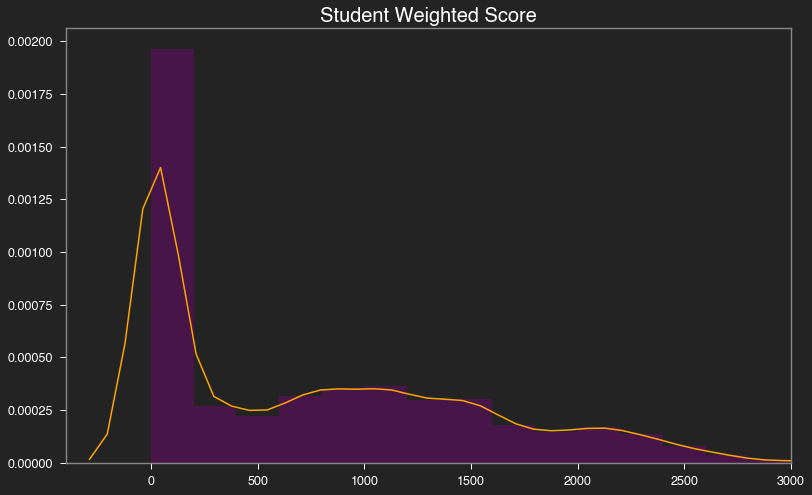

In [533]:
sns.distplot(studentWeightedScore.weighted_score, color='purple', kde_kws={"color":"orange"})
plt.title('Student Weighted Score')
plt.xlim(-400,3000)
plt.xlabel('');

In [534]:
df = student.merge(studentWeightedScore).merge(courses).drop_duplicates()
df.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,assessment_type,assessments_date,weighted_score,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1752,18,0,TMA,19.0,780.0,268
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1753,53,0,TMA,54.0,1700.0,268


In [535]:
# information about the available materials in the VLE. Typically these are html pages or pdf files
# students have access to these materials online and their interactions with the materials are 
# recorded
vle = pd.read_csv(path+'vle.csv')
vle.head(2)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN


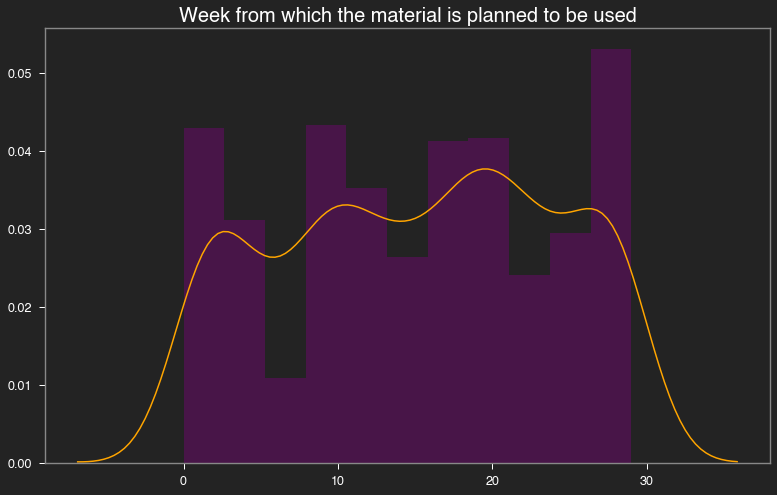

In [536]:
sns.distplot(vle.week_from, color='purple', kde_kws={"color":"orange"})
plt.title('Week from which the material is planned to be used')
plt.xlabel('');

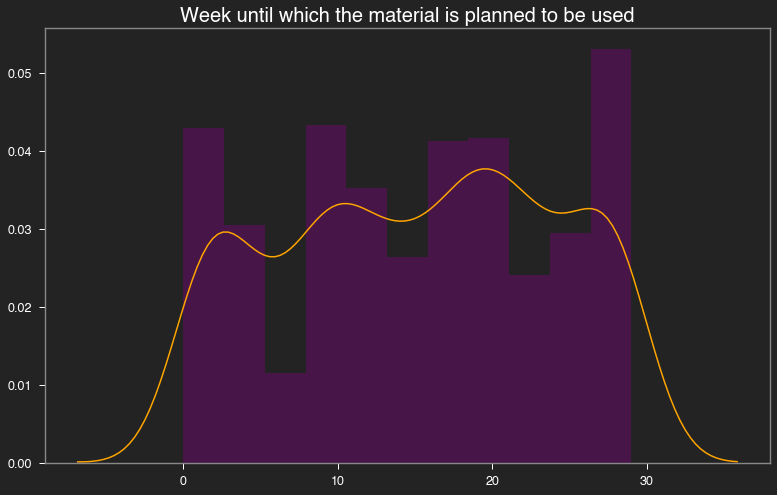

In [537]:
sns.distplot(vle.week_to, color='purple', kde_kws={"color":"orange"})
plt.title('Week until which the material is planned to be used')
plt.xlabel('');

In [538]:
# student’s interactions with the materials in the VLE
studentVle = pd.read_csv(path+'studentVle.csv')
studentVle.rename(inplace=True,columns={'date':'vle_date'})
studentVle.head(2)

,code_module,code_presentation,id_student,id_site,vle_date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1


In [539]:
studentVle.sum_click.value_counts(True)

1       4.799414e-01
2       1.810392e-01
3       9.059143e-02
4       5.751684e-02
5       3.896087e-02
            ...     
403     9.385019e-08
402     9.385019e-08
401     9.385019e-08
395     9.385019e-08
6977    9.385019e-08
Name: sum_click, Length: 498, dtype: float64

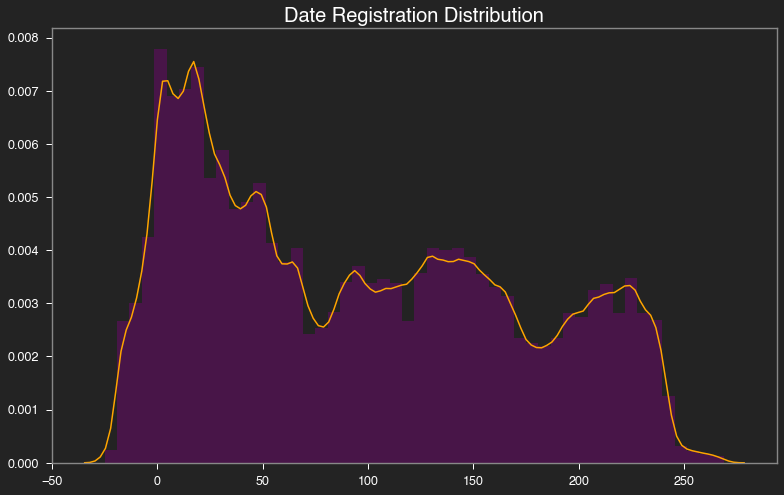

In [540]:
sns.distplot(studentVle.vle_date, color='purple', kde_kws={"color":"orange"})
plt.title('Date Registration Distribution')
plt.xlabel('');

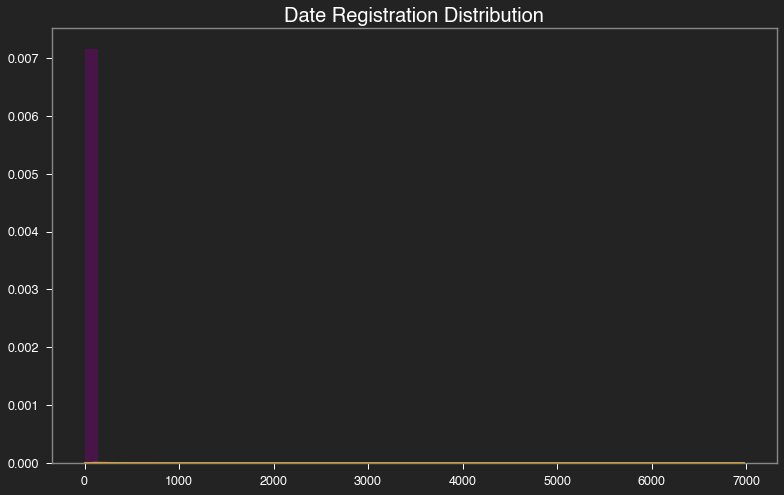

In [541]:
sns.distplot(studentVle.sum_click, color='purple', kde_kws={"color":"orange"})
plt.title('Date Registration Distribution')
# plt.xlim(-10,150)
plt.xlabel('');

## Merging and Grouping the data

In [542]:
studentVleMerge = studentVle.merge(vle).drop_duplicates()
studentVleMerge.head(2)

,code_module,code_presentation,id_student,id_site,vle_date,sum_click,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN


In [543]:
df1=studentVleMerge.groupby(['id_student','code_presentation','code_module'],as_index=False).mean()
df1.head(2)

,id_student,code_presentation,code_module,id_site,vle_date,sum_click,week_from,week_to
0,6516,2014J,AAA,877298.465600,111.059200,4.344000,1.428571,1.428571
1,8462,2013J,DDD,673960.576792,37.645051,2.163823,NaN,NaN


In [544]:
df2 = df.merge(df1).drop_duplicates()
df2.drop(inplace=True,columns=['id_site','id_assessment','date_unregistration','week_to',
                               'week_from'])
df2.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_submitted,is_banked,assessment_type,assessments_date,weighted_score,module_presentation_length,vle_date,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,18,0,TMA,19.0,780.0,268,101.651042,4.802083
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,53,0,TMA,54.0,1700.0,268,101.651042,4.802083


## Plotting for Region

In [545]:
import json
with open('/Users/pedrocerbino/Downloads/convert.json') as f:
    regions = json.load(f)
regions['features'][0]['properties']

{'geo_code': 'N92000002',
 'geo_label': 'Northern Ireland',
 'geo_labelw': 'Gogledd Iwerddon',
 'label': 'N92000002',
 'name': 'Northern Ireland',
 'objectid': 0,
 'rgn17cd': '0',
 'rgn17nm': '0',
 'bng_e': 0,
 'bng_n': 0,
 'long': 0,
 'lat': 0,
 'st_areasha': 0,
 'st_lengths': 0}

In [546]:
dicio = {}
for i in range(12):
    if i < 3:
        dicio[regions['features'][i]['properties']['geo_code']] = regions['features'][i][
                                                                'properties']['geo_label']
        regions['features'][i]['properties']['id'] = str(regions['features'][i]['properties']['geo_code'])
    else:
        dicio[regions['features'][i]['properties']['rgn17cd']] = regions['features'][i][
                                                                'properties']['rgn17nm']
        regions['features'][i]['properties']['id'] = str(regions['features'][i]['properties']['rgn17cd'])

In [548]:
df10 = df2.copy()
df10.final_result = df10.final_result.map({'Withdrawn':0,'Fail':0,'Pass':1,'Distinction':2})
df10.imd_band = df10.imd_band.map({'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,
                                  '60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9})
df10.highest_education = df10.highest_education.map({'No Formal quals':0,'Lower Than a Level':1,
                                                    'A Level or Equivalent':2,'HE Qualification':3,
                                                    'Post Graduate Qualification':4})
df10.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_submitted,is_banked,assessment_type,assessments_date,weighted_score,module_presentation_length,vle_date,sum_click
0,AAA,2013J,11391,M,East Anglian Region,3.0,9.0,55<=,0,240,N,1,-159.0,18,0,TMA,19.0,780.0,268,101.651042,4.802083
1,AAA,2013J,11391,M,East Anglian Region,3.0,9.0,55<=,0,240,N,1,-159.0,53,0,TMA,54.0,1700.0,268,101.651042,4.802083


In [549]:
df_region = pd.DataFrame(round(df10.region.value_counts(True)*100,2))
for i in ['weighted_score','final_result','imd_band','highest_education']:
    df_region[i] = df10.groupby(['region']).mean()[i].copy()
df_region.rename({'South Region':'South West Region'},inplace=True)
df_region.reset_index(inplace=True)
df_region = df_region.groupby('index',as_index=False).mean().copy()
df_region['location'] = ['E12000006','E12000004','N92000002','E12000007','E12000001',
                         'E12000002','S92000003','E12000008','E12000009','W92000004','E12000005',
                         'E12000003']
df_region.location = df_region.location.astype('string')
df_region

,index,region,weighted_score,final_result,imd_band,highest_education,location
0,East Anglian Region,10.50,883.241759,0.923747,5.439535,2.185105,E12000006
1,East Midlands Region,7.10,861.444634,0.898621,4.455393,2.169054,E12000004
2,Ireland,4.22,930.375239,0.887026,4.306399,2.384882,N92000002
3,London Region,9.42,857.204836,0.879538,3.213177,2.232879,E12000007
4,North Region,5.89,1031.983027,1.002639,3.248789,2.374140,E12000001
...,...,...,...,...,...,...,...
7,South East Region,6.78,889.210276,0.984639,5.234490,2.207787,E12000008
8,South West Region,8.92,909.670873,0.959961,5.425034,2.194001,E12000009
9,Wales,6.46,897.907712,0.864694,4.279615,2.308600,W92000004
10,West Midlands Region,7.50,863.872772,0.857099,3.584835,2.105276,E12000005


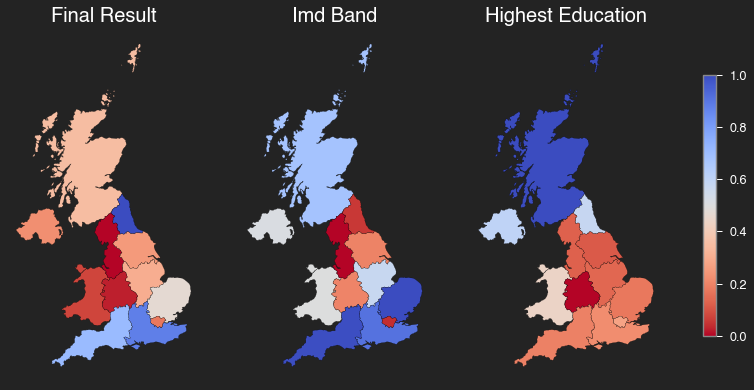

In [655]:
geo = gpd.GeoDataFrame.from_features(regions["features"])
geo_df = geo.merge(df_region, left_on="id", right_on='location')

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True)
for i,m in zip(['final_result','imd_band','highest_education'],[0,1,2]):
    geo_df.plot(ax=axes[m],column=geo_df[i],cmap='coolwarm_r',edgecolor='black')
    sm = plt.cm.ScalarMappable(cmap='coolwarm_r', norm=plt.Normalize())
    axes[m].set_title(' '.join(i.split('_')).title())
    axes[m].axis('off')

fig.subplots_adjust(right=1)
sm = plt.cm.ScalarMappable(cmap='coolwarm_r', norm=plt.Normalize())
fig.colorbar(sm,shrink=0.6,ax=axes.ravel().tolist());

In [551]:
df3 = pd.get_dummies(df2,drop_first=True,columns=['gender','region','highest_education','imd_band',
                                             'age_band','disability'])
df3.head(2)

,code_module,code_presentation,id_student,num_of_prev_attempts,studied_credits,final_result,date_registration,date_submitted,is_banked,assessment_type,assessments_date,weighted_score,module_presentation_length,vle_date,sum_click,gender_M,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_10-20,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_35-55,age_band_55<=,disability_Y
0,AAA,2013J,11391,0,240,Pass,-159.0,18,0,TMA,19.0,780.0,268,101.651042,4.802083,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,AAA,2013J,11391,0,240,Pass,-159.0,53,0,TMA,54.0,1700.0,268,101.651042,4.802083,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [552]:
df4 = df3.groupby(['id_student','final_result'],as_index=False).mean()
df4 = df4[~df4.weighted_score.isna()].copy()
df4.date_registration.fillna(0,inplace=True)
df4.rename(columns={'age_band_55<=':'age_band_55_or_more'},inplace=True)
df4.head(2)

,id_student,final_result,num_of_prev_attempts,studied_credits,date_registration,date_submitted,is_banked,assessments_date,weighted_score,module_presentation_length,vle_date,sum_click,gender_M,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_10-20,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_35-55,age_band_55_or_more,disability_Y
0,6516,Pass,0.000000,60.000000,-52.000000,111.6,0.000000,114.200000,1270.000000,269.000000,111.059200,4.344000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,8462,Withdrawn,0.571429,72.857143,-80.428571,23.0,0.571429,57.142857,1112.857143,261.571429,21.847879,2.641638,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Plotting the Correlation

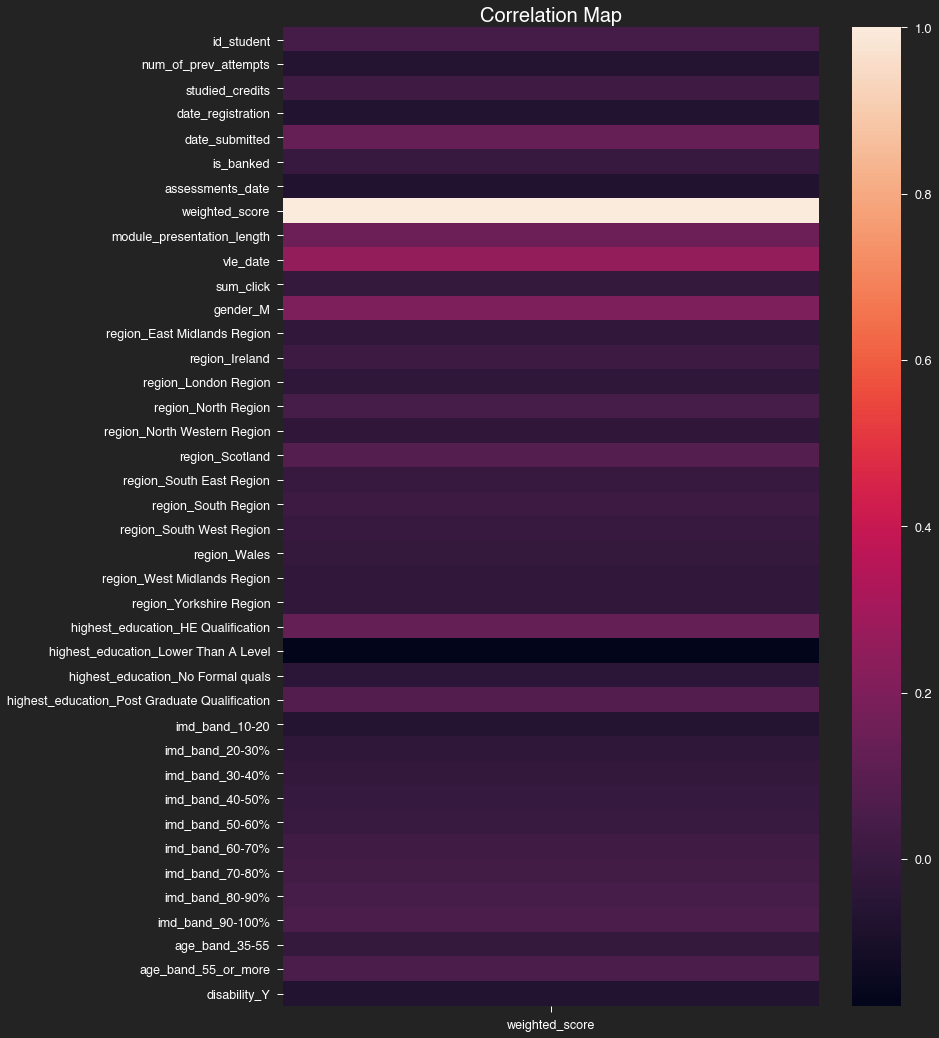

In [553]:
plt.figure(figsize=(12,18))
# sns.heatmap(pd.DataFrame(df3.corr()['WeightedScore']).drop('WeightedScore'))
sns.heatmap(pd.DataFrame(df4.corr()['weighted_score']))
plt.title('Correlation Map');

In [554]:
X, y = df4.drop(columns=['id_student','final_result','weighted_score']), df4.weighted_score

In [555]:
from sklearn.model_selection import train_test_split
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Testing XGBoost Model

In [556]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score 

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse and the r squared
rmse = np.sqrt(mean_squared_error(y_test,preds))
r2 = r2_score(y_test,preds)
print("RMSE: %f" % (rmse))
print("R2 Score: %f" % (r2))

RMSE: 303.480684
R2 Score: 0.794621


## XGBoost Cross Validation

Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.

In [557]:
# Create your DMatrix: dmatrix
dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":10}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=5, num_boost_round=100, 
                    metrics="rmse", as_pandas=True, seed=123, early_stopping_rounds=30)

# Print cv_results
print(cv_results.tail())

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
22       170.058554        2.846452      282.828949      11.069318
23       167.531833        2.038840      282.602063      11.049983
24       165.676260        1.892212      282.598822      10.961247
25       163.930911        2.316752      282.542291      11.194152
26       162.142538        2.012318      282.481293      11.337976


## Tuning the Model

### ETA (Learning Rate)
Can range between 0 and 1, with higher values of "eta" penalizing feature weights more strongly, causing much stronger regularization.

In [558]:
# Create your DMatrix: dmatrix
matrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":10}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
best_rmse,best_rmse_train = [],[]

# Systematically vary the eta 
for curr_val in eta_vals:
    
    params["eta"] = curr_val

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=matrix, params=params, nfold=5, metrics="rmse", 
                        as_pandas=True, seed=123, early_stopping_rounds=30, num_boost_round=100)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])
    best_rmse_train.append(cv_results["train-rmse-mean"].tail().values[-1])
    
# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"])) # 0.100

      eta    best_rmse
0   0.001  1044.630054
1   0.010   504.710809
2   0.100   276.245197
3   0.200   280.821845
4   0.300   282.481293
..    ...          ...
7   0.600   293.178119
8   0.700   299.198737
9   0.800   300.416376
10  0.900   308.845709
11  1.000   312.341632

[12 rows x 2 columns]


### Max Depth
Maximum depth that each tree in a boosting round can grow to.

In [562]:
# Create your DMatrix
matrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:squarederror"}

# Create list of max_depth values
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=matrix, params=params, nfold=5, metrics="rmse", 
                        as_pandas=True, seed=123, early_stopping_rounds=30, num_boost_round=100)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"])) # 6

    max_depth   best_rmse
0           2  322.668604
1           3  296.735992
2           4  283.491760
3           5  279.809241
4           6  278.671417
..        ...         ...
6           8  282.377832
7           9  281.510901
8          10  282.481293
9          15  295.021411
10         20  299.483704

[11 rows x 2 columns]


### Col Sample By Tree (Max Features)
Fraction of features to choose from at every split in a given tree

In [563]:
# Create your DMatrix
matrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:squarederror","max_depth":10}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=matrix, params=params, nfold=5,
                 num_boost_round=100, early_stopping_rounds=30,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])
# 0.8
# Print the resultant DataFrame 
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree   best_rmse
0               0.1  307.473041
1               0.5  280.802594
2               0.6  284.407062
3               0.7  284.608209
4               0.8  279.857104
5               0.9  281.677936
6               1.0  282.481299


### Randomized Search Cross Validation (XGBoost)
Often, GridSearchCV can be really time consuming, so in practice, you may want to use RandomizedSearchCV instead

In [564]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.5, 0.7, 0.8],
    'n_estimators': [25, 50, 100, 200],
    'max_depth': range(2, 12),
    'eta': [i/10 for i in range(1, 10)]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(cv=4,n_iter=5,scoring='neg_mean_squared_error',
                                    estimator=gbm,param_distributions=gbm_param_grid,verbose=1)

# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.4min finished


Best parameters found:  {'n_estimators': 100, 'max_depth': 11, 'eta': 0.3, 'colsample_bytree': 0.7}
Lowest RMSE found:  285.7577382260332


## Final Model (XGBoost)

In [565]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=4, seed=123,
                          colsample_bytree=0.5, eta=0.6)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse and the r squared
rmse = np.sqrt(mean_squared_error(y_test,preds))
r2 = r2_score(y_test,preds)
print("RMSE: %f" % (rmse))
print("R2 Score: %f" % (r2))

RMSE: 279.330219
R2 Score: 0.826008


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


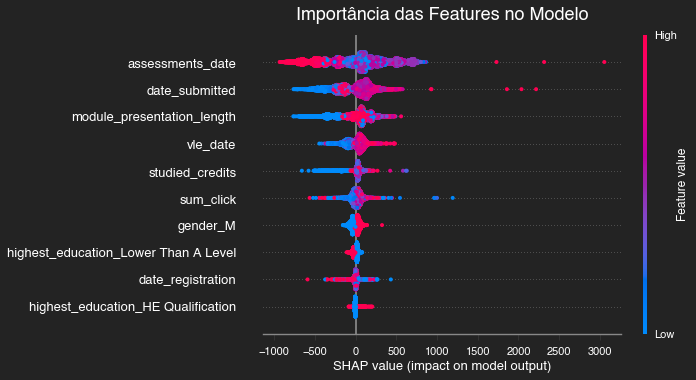

In [566]:
import shap
# monkey patch
booster = xg_reg.get_booster() 
model_bytearray = booster.save_raw()[4:]
booster.save_raw = lambda: model_bytearray

# shap expaliner
explainer = shap.TreeExplainer(booster, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X, check_additivity=False)
plt.title('Importância das Features no Modelo', size=18, color='w', pad=15)
shap.summary_plot(shap_values, X, show=False, max_display=10)

plt.xticks(color='w')
plt.yticks(color='w');

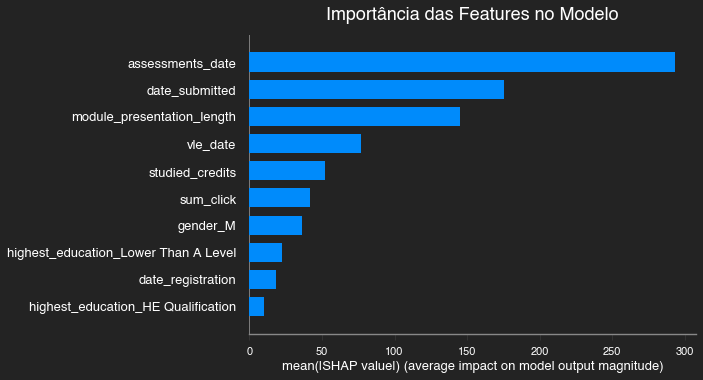

In [567]:
plt.title('Importância das Features no Modelo', size=18, color='w', pad=15)
shap.summary_plot(shap_values, X, plot_type="bar", show=False, max_display=10)
plt.xticks(color='w')
plt.yticks(color='w');

## Testing other Models

In [616]:
from pycaret.regression import * 

In [617]:
grid = setup(df4.drop(columns=['id_student','final_result']), target='weighted_score', 
             html=False, silent=True, verbose=False)

In [598]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,433.6338,301857.2531,549.192,0.3314,2.019,0.7532,1.372


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,433.6338,301857.2531,549.192,0.3314,2.0190,0.7532,1.372
lasso,Lasso Regression,433.7157,302226.0875,549.523,0.3307,2.0251,0.7534,0.077


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
en,Elastic Net,449.0040,320072.3969,565.5283,0.2910,2.0783,0.7546,0.064


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
en,Elastic Net,449.0040,320072.3969,565.5283,0.2910,2.0783,0.7546,0.064


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
en,Elastic Net,449.0040,320072.3969,565.5283,0.2910,2.0783,0.7546,0.064
llar,Lasso Least Angle Regression,535.0956,432406.8411,657.4060,0.0419,2.1774,0.8260,0.039


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
en,Elastic Net,449.0040,320072.3969,565.5283,0.2910,2.0783,0.7546,0.064
omp,Orthogonal Matching Pursuit,448.8694,331756.7474,575.7365,0.2653,2.0539,0.7647,0.033
llar,Lasso Least Angle Regression,535.0956,432406.8411,657.4060,0.0419,2.1774,0.8260,0.039


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
en,Elastic Net,449.0040,320072.3969,565.5283,0.2910,2.0783,0.7546,0.064
omp,Orthogonal Matching Pursuit,448.8694,331756.7474,575.7365,0.2653,2.0539,0.7647,0.033
llar,Lasso Least Angle Regression,535.0956,432406.8411,657.4060,0.0419,2.1774,0.8260,0.039


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
en,Elastic Net,449.0040,320072.3969,565.5283,0.2910,2.0783,0.7546,0.064
omp,Orthogonal Matching Pursuit,448.8694,331756.7474,575.7365,0.2653,2.0539,0.7647,0.033
llar,Lasso Least Angle Regression,535.0956,432406.8411,657.4060,0.0419,2.1774,0.8260,0.039
par,Passive Aggressive Regressor,538.1767,473122.0219,680.2312,-0.0503,2.0541,0.8539,0.110


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
huber,Huber Regressor,430.9929,307355.0058,554.1624,0.3193,1.9929,0.7365,0.714
en,Elastic Net,449.0040,320072.3969,565.5283,0.2910,2.0783,0.7546,0.064
omp,Orthogonal Matching Pursuit,448.8694,331756.7474,575.7365,0.2653,2.0539,0.7647,0.033
llar,Lasso Least Angle Regression,535.0956,432406.8411,657.4060,0.0419,2.1774,0.8260,0.039
par,Passive Aggressive Regressor,538.1767,473122.0219,680.2312,-0.0503,2.0541,0.8539,0.110


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,273.1098,165145.9156,406.1292,0.6343,1.0406,0.4566,0.230
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
huber,Huber Regressor,430.9929,307355.0058,554.1624,0.3193,1.9929,0.7365,0.714
en,Elastic Net,449.0040,320072.3969,565.5283,0.2910,2.0783,0.7546,0.064
omp,Orthogonal Matching Pursuit,448.8694,331756.7474,575.7365,0.2653,2.0539,0.7647,0.033
llar,Lasso Least Angle Regression,535.0956,432406.8411,657.4060,0.0419,2.1774,0.8260,0.039


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,241.2090,145472.4541,381.2939,0.6771,0.7700,0.3488,0.287
knn,K Neighbors Regressor,273.1098,165145.9156,406.1292,0.6343,1.0406,0.4566,0.230
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
huber,Huber Regressor,430.9929,307355.0058,554.1624,0.3193,1.9929,0.7365,0.714
en,Elastic Net,449.0040,320072.3969,565.5283,0.2910,2.0783,0.7546,0.064
omp,Orthogonal Matching Pursuit,448.8694,331756.7474,575.7365,0.2653,2.0539,0.7647,0.033


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,181.6358,79851.1945,282.4001,0.8230,0.7416,0.2740,10.005
dt,Decision Tree Regressor,241.2090,145472.4541,381.2939,0.6771,0.7700,0.3488,0.287
knn,K Neighbors Regressor,273.1098,165145.9156,406.1292,0.6343,1.0406,0.4566,0.230
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
huber,Huber Regressor,430.9929,307355.0058,554.1624,0.3193,1.9929,0.7365,0.714
en,Elastic Net,449.0040,320072.3969,565.5283,0.2910,2.0783,0.7546,0.064


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,181.6358,79851.1945,282.4001,0.8230,0.7416,0.2740,10.005
et,Extra Trees Regressor,190.9563,82094.9922,286.3221,0.8180,0.9726,0.3033,10.474
dt,Decision Tree Regressor,241.2090,145472.4541,381.2939,0.6771,0.7700,0.3488,0.287
knn,K Neighbors Regressor,273.1098,165145.9156,406.1292,0.6343,1.0406,0.4566,0.230
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077
huber,Huber Regressor,430.9929,307355.0058,554.1624,0.3193,1.9929,0.7365,0.714


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,181.6358,79851.1945,282.4001,0.8230,0.7416,0.2740,10.005
et,Extra Trees Regressor,190.9563,82094.9922,286.3221,0.8180,0.9726,0.3033,10.474
dt,Decision Tree Regressor,241.2090,145472.4541,381.2939,0.6771,0.7700,0.3488,0.287
knn,K Neighbors Regressor,273.1098,165145.9156,406.1292,0.6343,1.0406,0.4566,0.230
ada,AdaBoost Regressor,387.6463,232861.2791,481.4136,0.4833,1.9651,0.6934,1.700
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056
lasso,Lasso Regression,433.7157,302226.0875,549.5230,0.3307,2.0251,0.7534,0.077


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,181.6358,79851.1945,282.4001,0.8230,0.7416,0.2740,10.005
et,Extra Trees Regressor,190.9563,82094.9922,286.3221,0.8180,0.9726,0.3033,10.474
gbr,Gradient Boosting Regressor,232.9476,108848.8625,329.8247,0.7588,1.4374,0.3690,2.859
dt,Decision Tree Regressor,241.2090,145472.4541,381.2939,0.6771,0.7700,0.3488,0.287
knn,K Neighbors Regressor,273.1098,165145.9156,406.1292,0.6343,1.0406,0.4566,0.230
ada,AdaBoost Regressor,387.6463,232861.2791,481.4136,0.4833,1.9651,0.6934,1.700
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074
lar,Least Angle Regression,433.8089,302024.2835,549.3459,0.3311,2.0162,0.7544,0.056


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,189.7810,79335.9047,281.5796,0.8240,1.2012,0.2883,7.087
rf,Random Forest Regressor,181.6358,79851.1945,282.4001,0.8230,0.7416,0.2740,10.005
et,Extra Trees Regressor,190.9563,82094.9922,286.3221,0.8180,0.9726,0.3033,10.474
gbr,Gradient Boosting Regressor,232.9476,108848.8625,329.8247,0.7588,1.4374,0.3690,2.859
dt,Decision Tree Regressor,241.2090,145472.4541,381.2939,0.6771,0.7700,0.3488,0.287
knn,K Neighbors Regressor,273.1098,165145.9156,406.1292,0.6343,1.0406,0.4566,0.230
ada,AdaBoost Regressor,387.6463,232861.2791,481.4136,0.4833,1.9651,0.6934,1.700
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,189.7810,79335.9047,281.5796,0.8240,1.2012,0.2883,7.087
rf,Random Forest Regressor,181.6358,79851.1945,282.4001,0.8230,0.7416,0.2740,10.005
et,Extra Trees Regressor,190.9563,82094.9922,286.3221,0.8180,0.9726,0.3033,10.474
lightgbm,Light Gradient Boosting Machine,191.7656,83060.3369,287.7175,0.8164,1.1795,0.2994,0.262
gbr,Gradient Boosting Regressor,232.9476,108848.8625,329.8247,0.7588,1.4374,0.3690,2.859
dt,Decision Tree Regressor,241.2090,145472.4541,381.2939,0.6771,0.7700,0.3488,0.287
knn,K Neighbors Regressor,273.1098,165145.9156,406.1292,0.6343,1.0406,0.4566,0.230
ada,AdaBoost Regressor,387.6463,232861.2791,481.4136,0.4833,1.9651,0.6934,1.700
lr,Linear Regression,433.6338,301857.2531,549.1920,0.3314,2.0190,0.7532,1.372
ridge,Ridge Regression,433.6320,301855.2344,549.1901,0.3314,2.0191,0.7532,0.065


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,186.3760,75218.1492,274.0612,0.8335,1.2259,0.2892,9.053
xgboost,Extreme Gradient Boosting,189.7810,79335.9047,281.5796,0.8240,1.2012,0.2883,7.087
rf,Random Forest Regressor,181.6358,79851.1945,282.4001,0.8230,0.7416,0.2740,10.005
et,Extra Trees Regressor,190.9563,82094.9922,286.3221,0.8180,0.9726,0.3033,10.474
lightgbm,Light Gradient Boosting Machine,191.7656,83060.3369,287.7175,0.8164,1.1795,0.2994,0.262
gbr,Gradient Boosting Regressor,232.9476,108848.8625,329.8247,0.7588,1.4374,0.3690,2.859
dt,Decision Tree Regressor,241.2090,145472.4541,381.2939,0.6771,0.7700,0.3488,0.287
knn,K Neighbors Regressor,273.1098,165145.9156,406.1292,0.6343,1.0406,0.4566,0.230
ada,AdaBoost Regressor,387.6463,232861.2791,481.4136,0.4833,1.9651,0.6934,1.700
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,186.3760,75218.1492,274.0612,0.8335,1.2259,0.2892,9.053
xgboost,Extreme Gradient Boosting,189.7810,79335.9047,281.5796,0.8240,1.2012,0.2883,7.087
rf,Random Forest Regressor,181.6358,79851.1945,282.4001,0.8230,0.7416,0.2740,10.005
et,Extra Trees Regressor,190.9563,82094.9922,286.3221,0.8180,0.9726,0.3033,10.474
lightgbm,Light Gradient Boosting Machine,191.7656,83060.3369,287.7175,0.8164,1.1795,0.2994,0.262
gbr,Gradient Boosting Regressor,232.9476,108848.8625,329.8247,0.7588,1.4374,0.3690,2.859
dt,Decision Tree Regressor,241.2090,145472.4541,381.2939,0.6771,0.7700,0.3488,0.287
knn,K Neighbors Regressor,273.1098,165145.9156,406.1292,0.6343,1.0406,0.4566,0.230
ada,AdaBoost Regressor,387.6463,232861.2791,481.4136,0.4833,1.9651,0.6934,1.700
br,Bayesian Ridge,433.6430,301891.6899,549.2213,0.3314,2.0199,0.7533,0.074


## Evaluating CatBoost

In [599]:
import catboost as cb
# Build and fit a CatBoost regressor
reg_cat = cb.CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=500,
                              silent=True)
reg_cat.fit(X_train, y_train)

# Calculate the predictions on the set set
preds = reg_cat.predict(X_test)

# Evaluate the performance using the RMSE
rmse_cat = np.sqrt(mean_squared_error(y_test, preds))
r2_cat = r2_score(y_test,preds)
print('RMSE (CatBoost): {:.3f}'.format(rmse_cat))
print("R2 Score (CatBoost): %f" % (r2_cat))

RMSE (CatBoost): 0.282
R2 Score (CatBoost): 0.665681


### Randomized Search Cross Validation (CatBoost)

In [600]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid: gbm_param_grid 
cb_param_grid = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200]}

# Instantiate the regressor: gbm
cb_tunned = cb.CatBoostRegressor(silent=True)

# Perform random search: grid_mse
randomized_mse_cb = RandomizedSearchCV(cv=4,n_iter=5,scoring='neg_mean_squared_error',
                random_state=123,estimator=cb_tunned,param_distributions=cb_param_grid,verbose=1)

# Fit randomized_mse to the data
randomized_mse_cb.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse_cb.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse_cb.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.7min finished


Best parameters found:  {'learning_rate': 0.3, 'l2_leaf_reg': 10, 'iterations': 500, 'depth': 4, 'border_count': 200}
Lowest RMSE found:  0.2768320102495092


## Final Regression Model (CatBoost)

In [601]:
import catboost as cb
# Build and fit a CatBoost regressor
reg_cat = cb.CatBoostRegressor(learning_rate=0.3,l2_leaf_reg=10,iterations=500,depth=4,
                               border_count=200,random_state=500, silent=True)
# Fit the model
reg_cat.fit(X_train, y_train)

# Calculate the predictions on the set set
preds = reg_cat.predict(X_test)

# Evaluate the performance using the RMSE
rmse_cat = np.sqrt(mean_squared_error(y_test, preds))
r2_cat = r2_score(y_test,preds)
print('RMSE (CatBoost): {:.3f}'.format(rmse_cat))
print("R2 Score (CatBoost): %f" % (r2_cat))

RMSE (CatBoost): 0.272
R2 Score (CatBoost): 0.688290


In [618]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,177.5166,65826.6193,256.5670,0.8498,1.2801,0.2700
1,197.5932,108785.5463,329.8265,0.7795,1.2952,0.3121
2,187.3321,71411.2501,267.2288,0.8428,1.2433,0.2685
3,175.6258,65420.9576,255.7752,0.8469,1.2065,0.2557
4,184.3884,69494.1416,263.6174,0.8456,1.2150,0.2854
5,192.8122,80876.2564,284.3875,0.8212,1.1831,0.3241
6,185.2198,73852.1127,271.7575,0.8356,1.2133,0.2880
7,185.2430,68369.8083,261.4762,0.8530,1.1158,0.3051
8,182.8214,70353.4755,265.2423,0.8470,1.1227,0.2862
9,187.6411,73323.6875,270.7835,0.8292,1.2871,0.3062


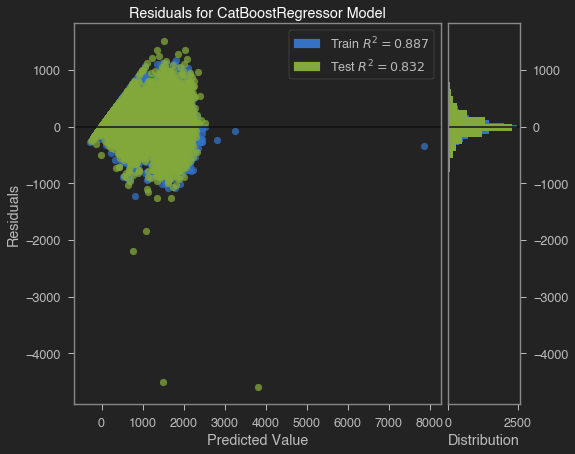

In [619]:
plot_model(catboost)

In [604]:
plot_model(catboost,plot='parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


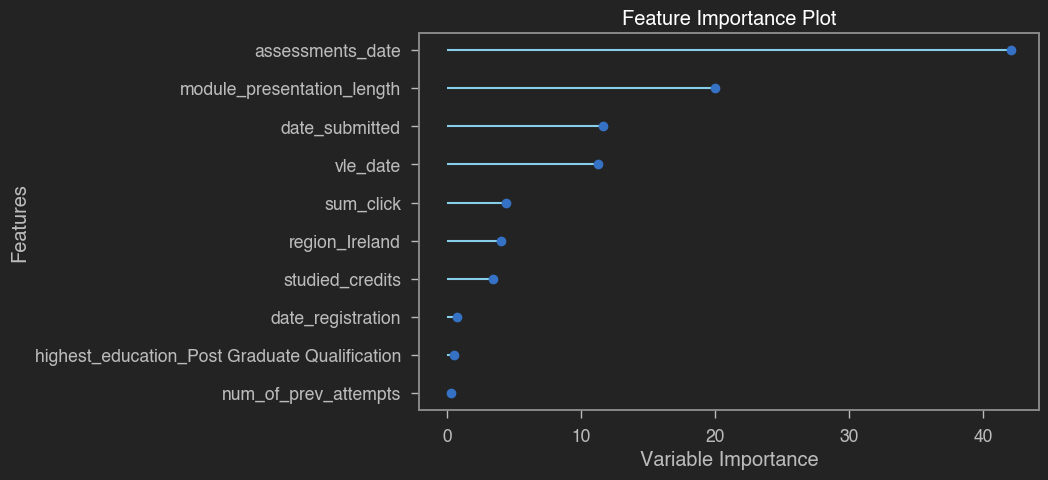

In [614]:
plot_model(catboost,plot='feature')

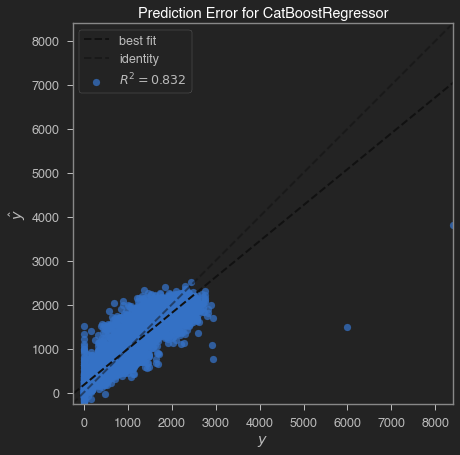

In [620]:
plot_model(catboost,plot='error')

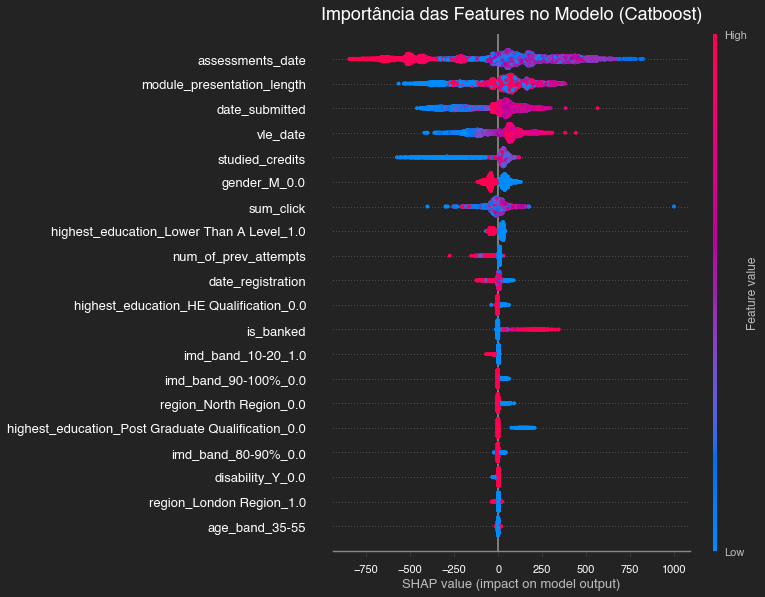

In [621]:
plt.title('Importância das Features no Modelo (Catboost)', size=18, color='w', pad=15)
interpret_model(catboost, show=False)
plt.xticks(color='w')
plt.yticks(color='w');

### Checking if dataset is Balanced

In [608]:
pd.DataFrame(round(df4.final_result.value_counts(True)*100,1))

,final_result
1,59.8
0,40.2


In [642]:
# Create target and explain set
X, y = df4.drop(columns=['id_student','final_result','weighted_score']), df4.final_result

# Create the training and test sets
from sklearn.model_selection import train_test_split
y = y.map({'Withdrawn':0,'Fail':0,'Pass':1,'Distinction':1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Final Classification Model (CatBoost)

In [623]:
from pycaret.classification import * 

In [640]:
df4 = df3.groupby(['id_student','final_result'],as_index=False).mean()
df4 = df4[~df4.weighted_score.isna()].copy()
df4.date_registration.fillna(0,inplace=True)
df4.rename(columns={'age_band_55<=':'age_band_55_or_more'},inplace=True)
df4.head(2)

,id_student,final_result,num_of_prev_attempts,studied_credits,date_registration,date_submitted,is_banked,assessments_date,weighted_score,module_presentation_length,vle_date,sum_click,gender_M,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_10-20,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_35-55,age_band_55_or_more,disability_Y
0,6516,Pass,0.000000,60.000000,-52.000000,111.6,0.000000,114.200000,1270.000000,269.000000,111.059200,4.344000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,8462,Withdrawn,0.571429,72.857143,-80.428571,23.0,0.571429,57.142857,1112.857143,261.571429,21.847879,2.641638,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [628]:
df4.final_result = df4.final_result.map({'Withdrawn':0,'Fail':0,'Pass':1,'Distinction':1})
grid = setup(df4.drop(columns=['id_student','weighted_score']), target='final_result', 
             html=False, silent=True, verbose=False)

In [631]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.97


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
nb,Naive Bayes,0.8706,0.8934,0.9439,0.8545,0.8970,0.7240,0.7306,0.083


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
nb,Naive Bayes,0.8706,0.8934,0.9439,0.8545,0.8970,0.7240,0.7306,0.083
dt,Decision Tree Classifier,0.8482,0.8428,0.8711,0.8742,0.8726,0.6849,0.6850,0.173


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
svm,SVM - Linear Kernel,0.8737,0.0000,0.9426,0.8606,0.8989,0.7314,0.7399,0.599
nb,Naive Bayes,0.8706,0.8934,0.9439,0.8545,0.8970,0.7240,0.7306,0.083
dt,Decision Tree Classifier,0.8482,0.8428,0.8711,0.8742,0.8726,0.6849,0.6850,0.173


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
svm,SVM - Linear Kernel,0.8737,0.0000,0.9426,0.8606,0.8989,0.7314,0.7399,0.599
nb,Naive Bayes,0.8706,0.8934,0.9439,0.8545,0.8970,0.7240,0.7306,0.083
dt,Decision Tree Classifier,0.8482,0.8428,0.8711,0.8742,0.8726,0.6849,0.6850,0.173


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9008,0.9352,0.9777,0.8718,0.9217,0.7876,0.7974,2.174
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
svm,SVM - Linear Kernel,0.8737,0.0000,0.9426,0.8606,0.8989,0.7314,0.7399,0.599
nb,Naive Bayes,0.8706,0.8934,0.9439,0.8545,0.8970,0.7240,0.7306,0.083
dt,Decision Tree Classifier,0.8482,0.8428,0.8711,0.8742,0.8726,0.6849,0.6850,0.173


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9008,0.9352,0.9777,0.8718,0.9217,0.7876,0.7974,2.174
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
svm,SVM - Linear Kernel,0.8737,0.0000,0.9426,0.8606,0.8989,0.7314,0.7399,0.599
nb,Naive Bayes,0.8706,0.8934,0.9439,0.8545,0.8970,0.7240,0.7306,0.083
dt,Decision Tree Classifier,0.8482,0.8428,0.8711,0.8742,0.8726,0.6849,0.6850,0.173
qda,Quadratic Discriminant Analysis,0.8478,0.8857,0.9102,0.8465,0.8772,0.6780,0.6811,0.190


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9008,0.9352,0.9777,0.8718,0.9217,0.7876,0.7974,2.174
ada,Ada Boost Classifier,0.8958,0.9318,0.9697,0.8706,0.9174,0.7774,0.7858,0.787
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
svm,SVM - Linear Kernel,0.8737,0.0000,0.9426,0.8606,0.8989,0.7314,0.7399,0.599
nb,Naive Bayes,0.8706,0.8934,0.9439,0.8545,0.8970,0.7240,0.7306,0.083
dt,Decision Tree Classifier,0.8482,0.8428,0.8711,0.8742,0.8726,0.6849,0.6850,0.173
qda,Quadratic Discriminant Analysis,0.8478,0.8857,0.9102,0.8465,0.8772,0.6780,0.6811,0.190


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9020,0.9392,0.9771,0.8738,0.9225,0.7904,0.7997,2.710
rf,Random Forest Classifier,0.9008,0.9352,0.9777,0.8718,0.9217,0.7876,0.7974,2.174
ada,Ada Boost Classifier,0.8958,0.9318,0.9697,0.8706,0.9174,0.7774,0.7858,0.787
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
svm,SVM - Linear Kernel,0.8737,0.0000,0.9426,0.8606,0.8989,0.7314,0.7399,0.599
nb,Naive Bayes,0.8706,0.8934,0.9439,0.8545,0.8970,0.7240,0.7306,0.083
dt,Decision Tree Classifier,0.8482,0.8428,0.8711,0.8742,0.8726,0.6849,0.6850,0.173
qda,Quadratic Discriminant Analysis,0.8478,0.8857,0.9102,0.8465,0.8772,0.6780,0.6811,0.190


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9020,0.9392,0.9771,0.8738,0.9225,0.7904,0.7997,2.710
rf,Random Forest Classifier,0.9008,0.9352,0.9777,0.8718,0.9217,0.7876,0.7974,2.174
ada,Ada Boost Classifier,0.8958,0.9318,0.9697,0.8706,0.9174,0.7774,0.7858,0.787
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
lda,Linear Discriminant Analysis,0.8855,0.9119,0.9725,0.8555,0.9102,0.7539,0.7659,0.265
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
svm,SVM - Linear Kernel,0.8737,0.0000,0.9426,0.8606,0.8989,0.7314,0.7399,0.599
nb,Naive Bayes,0.8706,0.8934,0.9439,0.8545,0.8970,0.7240,0.7306,0.083
dt,Decision Tree Classifier,0.8482,0.8428,0.8711,0.8742,0.8726,0.6849,0.6850,0.173


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9020,0.9392,0.9771,0.8738,0.9225,0.7904,0.7997,2.710
rf,Random Forest Classifier,0.9008,0.9352,0.9777,0.8718,0.9217,0.7876,0.7974,2.174
et,Extra Trees Classifier,0.8959,0.9263,0.9769,0.8660,0.9181,0.7769,0.7876,2.229
ada,Ada Boost Classifier,0.8958,0.9318,0.9697,0.8706,0.9174,0.7774,0.7858,0.787
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
lda,Linear Discriminant Analysis,0.8855,0.9119,0.9725,0.8555,0.9102,0.7539,0.7659,0.265
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
svm,SVM - Linear Kernel,0.8737,0.0000,0.9426,0.8606,0.8989,0.7314,0.7399,0.599
nb,Naive Bayes,0.8706,0.8934,0.9439,0.8545,0.8970,0.7240,0.7306,0.083


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9025,0.9394,0.9664,0.8818,0.9221,0.7926,0.7987,5.153
gbc,Gradient Boosting Classifier,0.9020,0.9392,0.9771,0.8738,0.9225,0.7904,0.7997,2.710
rf,Random Forest Classifier,0.9008,0.9352,0.9777,0.8718,0.9217,0.7876,0.7974,2.174
et,Extra Trees Classifier,0.8959,0.9263,0.9769,0.8660,0.9181,0.7769,0.7876,2.229
ada,Ada Boost Classifier,0.8958,0.9318,0.9697,0.8706,0.9174,0.7774,0.7858,0.787
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
lda,Linear Discriminant Analysis,0.8855,0.9119,0.9725,0.8555,0.9102,0.7539,0.7659,0.265
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970
svm,SVM - Linear Kernel,0.8737,0.0000,0.9426,0.8606,0.8989,0.7314,0.7399,0.599


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9062,0.9427,0.9749,0.8808,0.9254,0.8000,0.8076,0.380
xgboost,Extreme Gradient Boosting,0.9025,0.9394,0.9664,0.8818,0.9221,0.7926,0.7987,5.153
gbc,Gradient Boosting Classifier,0.9020,0.9392,0.9771,0.8738,0.9225,0.7904,0.7997,2.710
rf,Random Forest Classifier,0.9008,0.9352,0.9777,0.8718,0.9217,0.7876,0.7974,2.174
et,Extra Trees Classifier,0.8959,0.9263,0.9769,0.8660,0.9181,0.7769,0.7876,2.229
ada,Ada Boost Classifier,0.8958,0.9318,0.9697,0.8706,0.9174,0.7774,0.7858,0.787
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
lda,Linear Discriminant Analysis,0.8855,0.9119,0.9725,0.8555,0.9102,0.7539,0.7659,0.265
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053
lr,Logistic Regression,0.8852,0.9128,0.9524,0.8681,0.9083,0.7557,0.7616,3.970


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9074,0.9444,0.9766,0.8812,0.9264,0.8024,0.8102,32.365
lightgbm,Light Gradient Boosting Machine,0.9062,0.9427,0.9749,0.8808,0.9254,0.8000,0.8076,0.380
xgboost,Extreme Gradient Boosting,0.9025,0.9394,0.9664,0.8818,0.9221,0.7926,0.7987,5.153
gbc,Gradient Boosting Classifier,0.9020,0.9392,0.9771,0.8738,0.9225,0.7904,0.7997,2.710
rf,Random Forest Classifier,0.9008,0.9352,0.9777,0.8718,0.9217,0.7876,0.7974,2.174
et,Extra Trees Classifier,0.8959,0.9263,0.9769,0.8660,0.9181,0.7769,0.7876,2.229
ada,Ada Boost Classifier,0.8958,0.9318,0.9697,0.8706,0.9174,0.7774,0.7858,0.787
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
lda,Linear Discriminant Analysis,0.8855,0.9119,0.9725,0.8555,0.9102,0.7539,0.7659,0.265
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9074,0.9444,0.9766,0.8812,0.9264,0.8024,0.8102,32.365
lightgbm,Light Gradient Boosting Machine,0.9062,0.9427,0.9749,0.8808,0.9254,0.8000,0.8076,0.380
xgboost,Extreme Gradient Boosting,0.9025,0.9394,0.9664,0.8818,0.9221,0.7926,0.7987,5.153
gbc,Gradient Boosting Classifier,0.9020,0.9392,0.9771,0.8738,0.9225,0.7904,0.7997,2.710
rf,Random Forest Classifier,0.9008,0.9352,0.9777,0.8718,0.9217,0.7876,0.7974,2.174
et,Extra Trees Classifier,0.8959,0.9263,0.9769,0.8660,0.9181,0.7769,0.7876,2.229
ada,Ada Boost Classifier,0.8958,0.9318,0.9697,0.8706,0.9174,0.7774,0.7858,0.787
knn,K Neighbors Classifier,0.8912,0.9070,0.9641,0.8683,0.9136,0.7677,0.7755,0.315
lda,Linear Discriminant Analysis,0.8855,0.9119,0.9725,0.8555,0.9102,0.7539,0.7659,0.265
ridge,Ridge Classifier,0.8854,0.0000,0.9728,0.8552,0.9102,0.7536,0.7657,0.053


In [651]:
df4 = df3.groupby(['id_student','final_result'],as_index=False).mean()
df4 = df4[~df4.weighted_score.isna()].copy()
df4.date_registration.fillna(0,inplace=True)
df4.rename(columns={'age_band_55<=':'age_band_55_or_more'},inplace=True)

# Create target and explain set
X, y = df4.drop(columns=['id_student','final_result','weighted_score']), df4.final_result

# Create the training and test sets
from sklearn.model_selection import train_test_split
y = y.map({'Withdrawn':0,'Fail':0,'Pass':1,'Distinction':1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

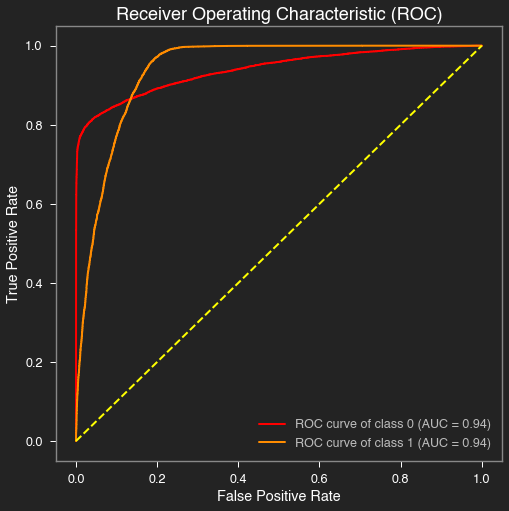

In [644]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize,StandardScaler
from sklearn.pipeline import Pipeline

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('dtree', cb.CatBoostClassifier(learning_rate=0.2, l2_leaf_reg=100, 
                                iterations=100, depth=6, border_count=50, silent=True))])
y_score = cross_val_predict(pipe, X, y, cv=10, method='predict_proba')

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,8))
colors = ['red', 'darkorange']
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.title('Receiver Operating Characteristic (ROC)', size=18)
plt.plot([0, 1], [0, 1], 'yellow', lw=2, ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

In [645]:
import catboost as cb
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid: gbm_param_grid 
cb_param_grid = {'depth':[3,1,2,6,4,5,7,8,9,10],
                  'iterations':[250,100,500,1000],
                  'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
                  'l2_leaf_reg':[3,1,5,10,100],
                  'border_count':[32,5,10,20,50,100,200]}

# Instantiate the regressor: gbm
cb_tunned = cb.CatBoostClassifier(silent=True)

# Perform random search: grid_mse
randomized_mse_cb = RandomizedSearchCV(cv=4,n_iter=5,scoring='neg_mean_squared_error',
                random_state=123,estimator=cb_tunned,param_distributions=cb_param_grid,verbose=1)

# Fit randomized_mse to the data
randomized_mse_cb.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse_cb.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse_cb.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.4min finished


Best parameters found:  {'learning_rate': 0.2, 'l2_leaf_reg': 100, 'iterations': 100, 'depth': 6, 'border_count': 50}
Lowest RMSE found:  0.3115146248938994


In [646]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import catboost as cb
# Build and fit a CatBoost regressor
clas_cat = cb.CatBoostClassifier(learning_rate=0.2, l2_leaf_reg=100, iterations=100, depth=6,
                                border_count=50,silent=True)

# Fit the model
clas_cat.fit(X_train, y_train)

# Calculate the predictions on the set set
preds = clas_cat.predict(X_test)

# Evaluate the performance using the RMSE
rmse_cat = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE (CatBoost): {:.3f}'.format(rmse_cat))

RMSE (CatBoost): 0.310


In [647]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1933
           1       0.88      0.98      0.93      3010

    accuracy                           0.90      4943
   macro avg       0.92      0.88      0.90      4943
weighted avg       0.91      0.90      0.90      4943



In [648]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

# Cross Validation
cb_cv = cross_validate(clas_cat, X, y, cv=10, scoring=scoring)
print('Other Scores AUC Mean: - Recall: '+str(round(cb_cv['test_recall'].mean()*100,2)) +
      ', Accuracy: ' + str(round(cb_cv['test_accuracy'].mean()*100,2)) +
      ', F1_Score: ' + str(round(cb_cv['test_f1_score'].mean()*100,2)),'\n')
print('Mean AUC Precision Score: {:.2f} %'.format(cb_cv['test_precision'].mean()*100))
print('Standard Deviation AUC Precision Score: {:.2f} %'.format(cb_cv['test_precision'].std()*100))
print('\n')
print('Mean AUC Accuracy Score: {:.2f} %'.format(cb_cv['test_accuracy'].mean()*100))
print('Standard Deviation AUC Accuracy Score: {:.2f} %'.format(cb_cv['test_accuracy'].std()*100))

Other Scores AUC Mean: - Recall: 97.83, Accuracy: 90.4, F1_Score: 92.42 

Mean AUC Precision Score: 87.59 %
Standard Deviation AUC Precision Score: 1.29 %


Mean AUC Accuracy Score: 90.40 %
Standard Deviation AUC Accuracy Score: 0.92 %


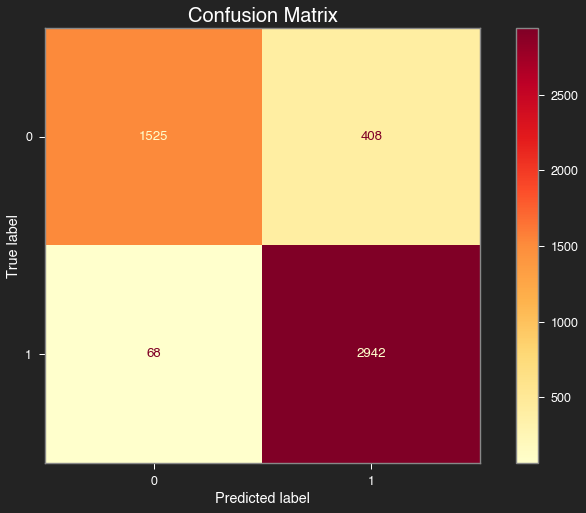

In [649]:
plot_confusion_matrix(clas_cat,X_test,y_test,cmap='YlOrRd')
plt.title('Confusion Matrix');

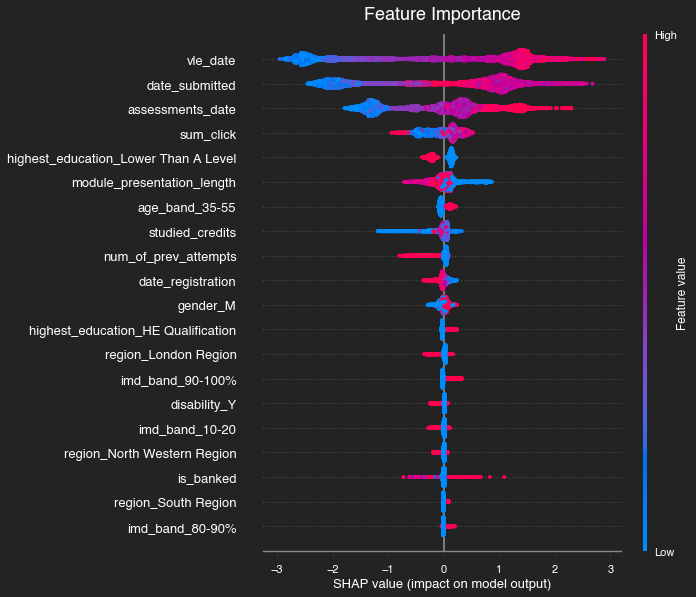

In [650]:
import shap
# shap expaliner
explainer = shap.TreeExplainer(clas_cat)
shap_values = explainer.shap_values(X, check_additivity=False)
plt.title('Feature Importance', size=18, color='w', pad=15)
shap.summary_plot(shap_values, X, show=False)
plt.xticks(color='w')
plt.yticks(color='w');